In [1]:
%load_ext autoreload
%autoreload 2


import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['text.usetex'] = True

import sympy as sym
from ClassicalApproximation_class import Classical as CS

In [8]:
x,  beta =sym.symbols('x, beta',positive=True)
yuk_tild=sym.exp(-x)
hult_tild=x*yuk_tild/(1-yuk_tild)

In [9]:
clasic=CS(yuk_tild,x,order=1)
clasic.compute()

clasic2=CS(hult_tild,x,order=1)

clasic2.compute()
# clasic2.calculate_xsec()[1]/xsec[1]

The potential is repulsive, building classical deflection angles tables.
The potential is repulsive, building classical deflection angles tables.


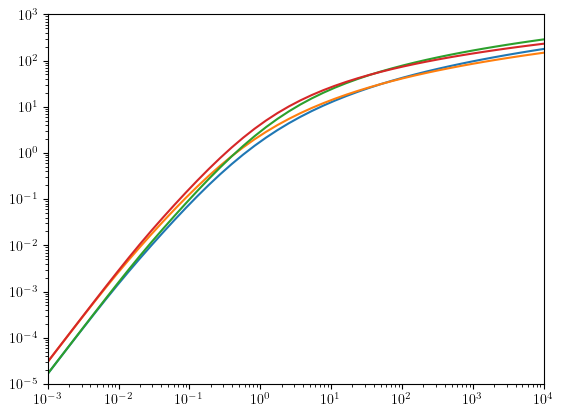

In [10]:
plt.loglog(*clasic.calculate_xsec())
plt.loglog(*clasic.calculate_xsec(func='viscosity'))

plt.loglog(*clasic2.calculate_xsec())
plt.loglog(*clasic2.calculate_xsec(func='viscosity'))

plt.ylim(1e-5, 1e3)
plt.xlim(1e-3, 1e4)
plt.show()

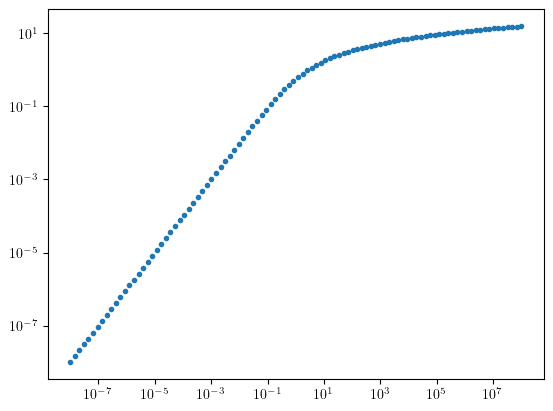

In [11]:
plt.loglog(clasic.beta_arr,clasic.xT_min_arr,'.')
plt.show()